In [2]:
import pandas as pd
import anndata as ad
import squidpy as sq
import scanpy as sc
import matplotlib.pyplot as plt

## Loading CODEX as AnnData Objects

In [3]:
dryad_data = pd.read_csv("../../data/stellarCODEX/stellarCODEX/B004_training_dryad.csv", index_col=0)

/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
gene_columns = dryad_data.columns[:-6]
coordinate_columns = dryad_data.columns[-6:-4]
metadata_columns = dryad_data.columns[-4:]

In [5]:
regions = dryad_data.unique_region.unique()
regions

array(['reg001_SB_B004', 'reg002_SB_B004', 'reg003_SB_B004',
       'reg004_SB_B004', 'reg001_CL_B004', 'reg002_CL_B004',
       'reg003_CL_B004', 'reg004_CL_B004'], dtype=object)

In [6]:
region_datasets = []
for region in regions:
    region_data = dryad_data[dryad_data.unique_region == region]
    region_dataset = ad.AnnData(X=region_data[gene_columns].values)
    region_dataset.var_names = gene_columns
    region_dataset.obsm["spatial"] = region_data[coordinate_columns].values
    region_dataset.obs = region_data[metadata_columns]
    region_datasets.append(region_dataset)

/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  after removing the cwd from sys.path.
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 4, 5, 6]

    Inferred to be: mixed-integer

  value_idx = self._prep_dim_index(value.index, attr)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [14788, 14789, 14790, 14791, 14792]

    Inferred to be: mixed-integer

  value_idx = self._prep_dim_index(value.index, attr)


In [19]:
positive_data = ((colon_data[gene_columns] - colon_data[gene_columns].min(axis=0)))

In [30]:
import numpy as np
positive_colon_data = np.log(positive_data / positive_data[positive_data > 0].min(axis=0) + 1)

In [7]:
colon_data = dryad_data[dryad_data.tissue == "CL"]
colon_data[gene_columns] -= colon_data[gene_columns].min(axis=0)
bowel_data = dryad_data[dryad_data.tissue == "SB"]
bowel_data[gene_columns] -= bowel_data[gene_columns].min(axis=0)

KeyboardInterrupt: 

In [19]:
colon_dataset = ad.AnnData(X=colon_data[gene_columns].values)
bowel_dataset = ad.AnnData(X=bowel_data[gene_columns].values)

/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  """Entry point for launching an IPython kernel.
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  


In [20]:
colon_dataset.obsm["spatial"] = colon_data[coordinate_columns].values
colon_dataset.obs = colon_data[metadata_columns]

bowel_dataset.obsm["spatial"] = bowel_data[coordinate_columns].values
bowel_dataset.obs = bowel_data[metadata_columns]

<Figure size 1800x1200 with 0 Axes>

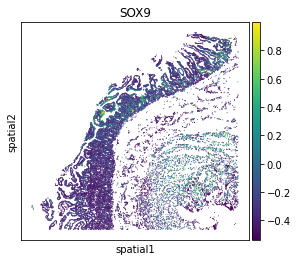

In [42]:
plt.figure(dpi=300)
sc.pl.spatial(region_datasets[1][region_datasets[1].X[:, 1] <1 ], color="SOX9", spot_size=40)

In [ ]:
gene_columns